,16 Soc Sec No,17 Firat name,Middle\nInitlal,ast name,18 Total Wages,19\nMult!\nState,20\nProba\n\ndonay,Probationary\nStart Date,Probationary\nEnd date
1,492-66-3626,Shena,NaN,oftis,"20,426 28",NaN,NaN,NaN,NaN
2,NaN,Abigail,NaN,Mactin,"12,000 00",NaN,NaN,NaN,NaN
3,497-94-6527,Amanda,NaN,Martin,"12,699 30",NaN,NaN,NaN,NaN
4,522-35-9077,Glain,NaN,Martin,"11,923 30",NaN,NaN,NaN,NaN
5,486-08-3114,Elizabeth,NaN,Maynard,"4,287 14",NaN,NaN,NaN,NaN
6,494-15-5292,Morgan,NaN,Miller,NaN,NaN,NaN,NaN,NaN
7,495-06-2096,NaN,NaN,Nash,"16,374 30",NaN,NaN,NaN,NaN
8,490-13-9546,Cody,NaN,NaN,"5,319_50",NaN,NaN,NaN,NaN
9,312-680-0458,Bronda,NaN,NaN,"4,807 50",NaN,NaN,NaN,NaN
10,493-19-0205,Gavin,NaN,Phelan,"2,408 10",NaN,NaN,NaN,NaN


<Figure size 1080x1080 with 0 Axes>

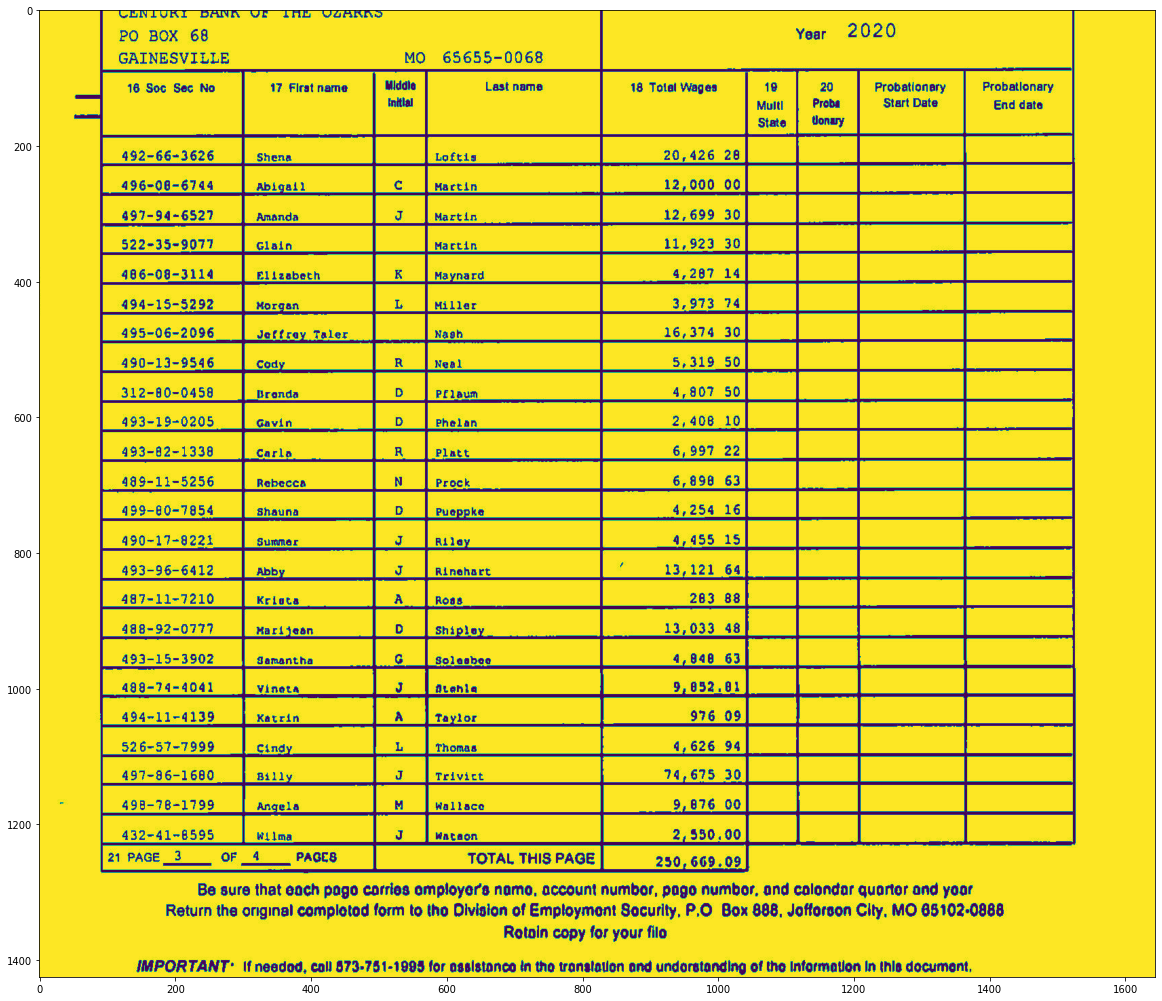

In [1]:
p = '0101439000.jpeg'

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import os
import math
import sys
import numpy as np
import pytesseract
import io 
import csv
import pandas as pd
import shutil, os

shutil.copytree('/home/vimal/Documents/table_detect_samples/structured images/input/sample', 
                os.path.join('/home/vimal/Documents/table_detect_samples/structured images/input',
                             os.path.splitext(p)[0]))
  
# Read Images
#img = mpimg.imread('/home/vimal/Documents/table_detect_samples/structured images/input/in/0836849000.jpeg')
img = mpimg.imread(os.path.join('/home/vimal/Documents/table_detect_samples/structured images/input/in',p))
plt.figure(figsize=(15,15))
# Output Images
#plt.imshow(img)

# Opens a image in RGB mode
#im = Image.open(r"/home/vimal/Documents/table_detect_samples/structured images/input/in",p)
#img = mpimg.imread(os.path.join('/home/vimal/Documents/table_detect_samples/structured images/input/in',p))
im = Image.open(os.path.join('/home/vimal/Documents/table_detect_samples/structured images/input/in',p))

#im =cv2.imread('/home/vimal/Documents/table_detect_samples/pre/0347682000.jpeg')
# Size of the image in pixels (size of orginal image)
# (This is not mandatory)
width, height = im.size
  
# Setting the points for cropped image
left = 5
top = height /4.9
right = 1650
bottom = 3 * height / 3.5
  
# Cropped image of above dimension
# (It will not change orginal image)
im1 = im.crop((left, top, right, bottom))
plt.figure(figsize=(20,20))
plt.imshow(im1)
#im1.save('/home/vimal/Documents/table_detect_samples/structured images/input/crop_images/0836849000_crop.jpeg')
#im1.save('/home/vimal/Documents/table_detect_samples/structured images/input/crop_images/0836849000_crop.jpeg')
b = os.path.splitext(p)[0]+'_crop.jpeg'
im1.save(os.path.join('/home/vimal/Documents/table_detect_samples/structured images/input/crop_images',b))
# Shows the image in image viewer

def extract_cell_images_from_table(image):
    BLUR_KERNEL_SIZE = (17, 17)
    STD_DEV_X_DIRECTION = 0
    STD_DEV_Y_DIRECTION = 0
    blurred = cv2.GaussianBlur(image, BLUR_KERNEL_SIZE, STD_DEV_X_DIRECTION, STD_DEV_Y_DIRECTION)
    MAX_COLOR_VAL = 255
    BLOCK_SIZE = 15
    SUBTRACT_FROM_MEAN = -2
    
    img_bin = cv2.adaptiveThreshold(
        ~blurred,
        MAX_COLOR_VAL,
        cv2.ADAPTIVE_THRESH_MEAN_C,
        cv2.THRESH_BINARY,
        BLOCK_SIZE,
        SUBTRACT_FROM_MEAN,
    )
    vertical = horizontal = img_bin.copy()
    SCALE = 5
    image_width, image_height = horizontal.shape
    horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (int(image_width / SCALE), 1))
    horizontally_opened = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, horizontal_kernel)
    vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, int(image_height / SCALE)))
    vertically_opened = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, vertical_kernel)
    
    horizontally_dilated = cv2.dilate(horizontally_opened, cv2.getStructuringElement(cv2.MORPH_RECT, (40, 1)))
    vertically_dilated = cv2.dilate(vertically_opened, cv2.getStructuringElement(cv2.MORPH_RECT, (1, 60)))
    
    mask = horizontally_dilated + vertically_dilated
    contours, heirarchy = cv2.findContours(
        mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE,
    )
    
    perimeter_lengths = [cv2.arcLength(c, True) for c in contours]
    epsilons = [0.05 * p for p in perimeter_lengths]
    approx_polys = [cv2.approxPolyDP(c, e, True) for c, e in zip(contours, epsilons)]
    
    # Filter out contours that aren't rectangular. Those that aren't rectangular
    # are probably noise.
    approx_rects = [p for p in approx_polys if len(p) == 4]
    bounding_rects = [cv2.boundingRect(a) for a in approx_polys]
    
    # Filter out rectangles that are too narrow or too short.
    MIN_RECT_WIDTH = 40
    MIN_RECT_HEIGHT = 10
    bounding_rects = [
        r for r in bounding_rects if MIN_RECT_WIDTH < r[2] and MIN_RECT_HEIGHT < r[3]
    ]
    
    # The largest bounding rectangle is assumed to be the entire table.
    # Remove it from the list. We don't want to accidentally try to OCR
    # the entire table.
    largest_rect = max(bounding_rects, key=lambda r: r[2] * r[3])
    bounding_rects = [b for b in bounding_rects if b is not largest_rect]
    
    cells = [c for c in bounding_rects]
    def cell_in_same_row(c1, c2):
        c1_center = c1[1] + c1[3] - c1[3] / 2
        c2_bottom = c2[1] + c2[3]
        c2_top = c2[1]
        return c2_top < c1_center < c2_bottom
    
    orig_cells = [c for c in cells]
    rows = []
    while cells:
        first = cells[0]
        rest = cells[1:]
        cells_in_same_row = sorted(
            [
                c for c in rest
                if cell_in_same_row(c, first)
            ],
            key=lambda c: c[0]
        )
    
        row_cells = sorted([first] + cells_in_same_row, key=lambda c: c[0])
        rows.append(row_cells)
        cells = [
            c for c in rest
            if not cell_in_same_row(c, first)
        ]
    
    # Sort rows by average height of their center.
    def avg_height_of_center(row):
        centers = [y + h - h / 2 for x, y, w, h in row]
        return sum(centers) / len(centers)
    
    rows.sort(key=avg_height_of_center)
    cell_images_rows = []
    for row in rows:
        cell_images_row = []
        for x, y, w, h in row:
            cell_images_row.append(image[y:y+h, x:x+w])
        cell_images_rows.append(cell_images_row)
    return cell_images_rows

def main(f):
    results = []
    directory, filename = os.path.split(f)
    table = cv2.imread(f, cv2.IMREAD_GRAYSCALE)
    rows = extract_cell_images_from_table(table)
    cell_img_dir = os.path.join(directory, "cells")
    os.makedirs(cell_img_dir, exist_ok=True)
    out_path = os.path.join('/home/vimal/Documents/table_detect_samples/structured images/input',
                            os.path.splitext(p)[0],'cells')
    paths = []
    for i, row in enumerate(rows):
        for j, cell in enumerate(row):
            cell_filename = "{:03d}-{:03d}.png".format(i, j)
            path = os.path.join(out_path, cell_filename)
            cv2.imwrite(path, cell)
            paths.append(path)
    return paths

f = os.path.join('/home/vimal/Documents/table_detect_samples/structured images/input/crop_images',b)

main(f)

def main(image_file, tess_args):
    """
    OCR the image and output the text to a file with an extension that is ready
    to be used in Tesseract training (.gt.txt).
    Tries to crop the image so that only the relevant text gets passed to Tesseract.
    Returns the name of the text file that contains the text.
    """
    #file_path = '/home/vimal/Documents/table_detect_samples/structured images/input/011364700/cells'
    #image_file = os.listdir(file_path)
    
    for f in image_file:
        #print(f)
        directory, filename = os.path.split(f)
        filename_sans_ext, ext = os.path.splitext(filename)
        image = cv2.imread(os.path.join(file_path,f), cv2.IMREAD_GRAYSCALE)
        cropped = crop_to_text(image)
        #ocr_data_dir = os.path.join(directory, "ocr_data")
        #os.makedirs(ocr_data_dir, exist_ok=True)
        #out_imagepath = os.path.join(ocr_data_dir, filename)
        out_path = os.path.join('/home/vimal/Documents/table_detect_samples/structured images/input',
                            os.path.splitext(p)[0],'text')
        out_txtpath = os.path.join(out_path, "{}.gt.txt".format(filename_sans_ext))
        #cv2.imwrite(out_imagepath, cropped)
        if not tess_args:
            d = os.path.dirname(sys.modules["table_ocr"].__file__)
            tessdata_dir = os.path.join(d, "tessdata")
            tess_args = ["--psm", "7", "-l", "table-ocr", "--tessdata-dir", tessdata_dir]
        txt = ocr_image(cropped, " ".join(tess_args))
        with open(out_txtpath, "w") as txt_file:
            txt_file.write(txt)
        #return out_txtpath
def crop_to_text(image):
    MAX_COLOR_VAL = 255
    BLOCK_SIZE = 15
    SUBTRACT_FROM_MEAN = -2

    img_bin = cv2.adaptiveThreshold(
        ~image,
        MAX_COLOR_VAL,
        cv2.ADAPTIVE_THRESH_MEAN_C,
        cv2.THRESH_BINARY,
        BLOCK_SIZE,
        SUBTRACT_FROM_MEAN,
    )

    img_h, img_w = image.shape
    horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (int(img_w * 0.5), 1))
    vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, int(img_h * 0.7)))
    horizontal_lines = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, horizontal_kernel)
    vertical_lines = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, vertical_kernel)
    both = horizontal_lines + vertical_lines
    cleaned = img_bin - both

    # Get rid of little noise.
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
    opened = cv2.morphologyEx(cleaned, cv2.MORPH_OPEN, kernel)
    opened = cv2.dilate(opened, kernel)

    contours, hierarchy = cv2.findContours(opened, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    bounding_rects = [cv2.boundingRect(c) for c in contours]
    NUM_PX_COMMA = 6
    MIN_CHAR_AREA = 5 * 9
    char_sized_bounding_rects = [(x, y, w, h) for x, y, w, h in bounding_rects if w * h > MIN_CHAR_AREA]
    if char_sized_bounding_rects:
        minx, miny, maxx, maxy = math.inf, math.inf, 0, 0
        for x, y, w, h in char_sized_bounding_rects:
            minx = min(minx, x)
            miny = min(miny, y)
            maxx = max(maxx, x + w)
            maxy = max(maxy, y + h)
        x, y, w, h = minx, miny, maxx - minx, maxy - miny
        cropped = image[y:min(img_h, y+h+NUM_PX_COMMA), x:min(img_w, x+w)]
    else:
        # If we morphed out all of the text, assume an empty image.
        cropped = MAX_COLOR_VAL * np.ones(shape=(20, 100), dtype=np.uint8)
    bordered = cv2.copyMakeBorder(cropped, 5, 5, 5, 5, cv2.BORDER_CONSTANT, None, 255)
    return bordered
def ocr_image(image, config):
    return pytesseract.image_to_string(
        image,
        config=config
    )

file_path = os.path.join('/home/vimal/Documents/table_detect_samples/structured images/input',
                            os.path.splitext(p)[0],'cells')
image_file = os.listdir(file_path)
tess_args = os.listdir(file_path)

main(image_file, tess_args)

def text_files_to_csv(files):
    """Files must be sorted lexicographically
    Filenames must be <row>-<colum>.txt.
    000-000.txt
    000-001.txt
    001-000.txt
    etc...
    """
    rows = []
    for f in files:
        directory, filename = os.path.split(f)
        with open(os.path.join(file_path,f)) as of:
            txt = of.read().strip()
        row, column = map(int, filename.split(".")[0].split("-"))
        if row == len(rows):
            rows.append([])
        rows[row].append(txt)

    csv_file = io.StringIO()
    writer = csv.writer(csv_file)
    writer.writerows(rows)
    return csv_file.getvalue()

def main(files):
    return text_files_to_csv(files)


file_path = os.path.join('/home/vimal/Documents/table_detect_samples/structured images/input',
                            os.path.splitext(p)[0],'text')
file = file = os.listdir(file_path)
files = sorted(file)

a = main(files)
#print(a)

c = os.path.splitext(p)[0]+'_text.txt'
cs = os.path.splitext(p)[0]+'_xl.csv'

text_file = open(os.path.join('/home/vimal/Documents/table_detect_samples/structured images/input',
                            os.path.splitext(p)[0],'text_file',c), "wt")
n = text_file.write(a)
text_file.close()

df = pd.read_csv(os.path.join('/home/vimal/Documents/table_detect_samples/structured images/input',
                            os.path.splitext(p)[0],'text_file',c),header=None)
#df = df.dropna(how='all', axis=1)
df.columns = df.iloc[0]
df = df[1:]
df.to_csv(os.path.join('/home/vimal/Documents/table_detect_samples/structured images/input',
                            os.path.splitext(p)[0],'csv',cs), 
                  index = None)
df





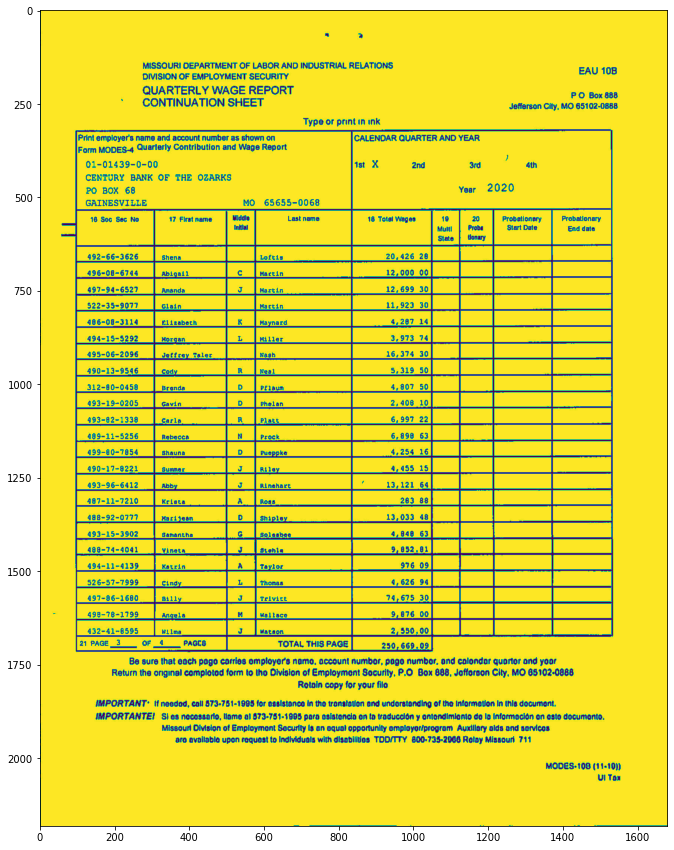

In [1]:
p = '0101439000.jpeg'

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import os
import math
import sys
import numpy as np
import pytesseract
import io 
import csv
import pandas as pd
import shutil, os

shutil.copytree('/home/vimal/Documents/table_detect_samples/extraction/input/sample', 
                os.path.join('/home/vimal/Documents/table_detect_samples/extraction/input',
                             os.path.splitext(p)[0]))
  
# Read Images
#img = mpimg.imread('/home/vimal/Documents/table_detect_samples/structured images/input/in/0836849000.jpeg')
img = mpimg.imread(os.path.join('/home/vimal/Documents/table_detect_samples/extraction/input/in',p))
plt.figure(figsize=(15,15))
plt.imshow(img)


,0,1,2,3,4,5,6,7,8,9
1,16.\nSSN,"17,\nFirst\nNome",Middte\nEnitial,Last\nNome,18.\nTotal\nWages,19\nMultl-\nstate,Check\nIf Yes,Start\nDate,End\nDate,NaN
2,468-21-5779,Isabell,A,Barker,"1,237.75",NaN,NaN,NaN,NaN,NaN
3,497-19-9474,Thomas,R,Beauette,151.72,NaN,NaN,NaN,NaN,NaN
4,343-94-7651,Edward,c,Berkheimer,"1,369.21",NaN,NaN,NaN,NaN,NaN
5,496-04-3491,Joshua,A,Blattel,2.753.490,NaN,NaN,NaN,NaN,NaN
6,§00-82-7463,Melinda,Jd,Blecha,"4,418.29",NaN,NaN,NaN,NaN,NaN
7,494-52-4195,Anna,M,Boveri“ ‘sr,1.160.87,NaN,NaN,NaN,NaN,NaN
8,496-11-6006,Ker1,a,Bover,7.372.62,NaN,NaN,NaN,NaN,NaN
9,491-94-0506,LeRoy,NaN,Brown,"6.166,24",NaN,NaN,NaN,NaN,NaN
10,498-19-5113,Rodney,R,Campboll,722.46,NaN,NaN,NaN,NaN,NaN


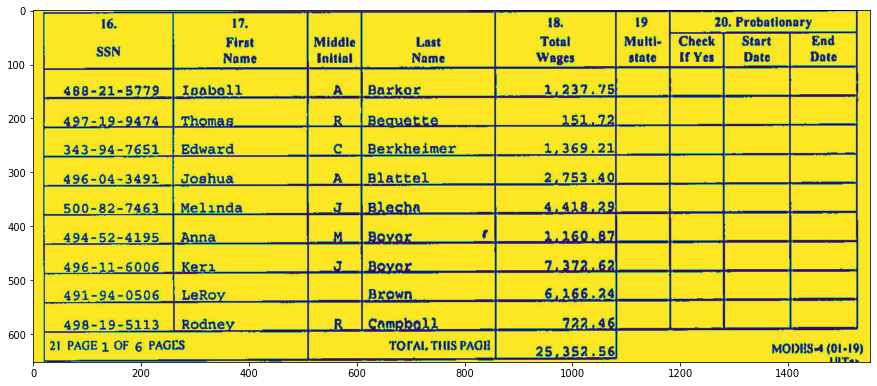

In [1]:
p = '0113647000.jpeg'

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import os
import math
import sys
import numpy as np
import pytesseract
import io 
import csv
import pandas as pd
import shutil, os

shutil.copytree('/home/vimal/Documents/table_detect_samples/extraction/input/sample', 
                os.path.join('/home/vimal/Documents/table_detect_samples/extraction/input',
                             os.path.splitext(p)[0]))
  
# Read Images
#img = mpimg.imread('/home/vimal/Documents/table_detect_samples/structured images/input/in/0836849000.jpeg')
img = mpimg.imread(os.path.join('/home/vimal/Documents/table_detect_samples/extraction/input/in',p))
#plt.figure(figsize=(15,15))
#plt.imshow(img)

def find_tables(image):
    BLUR_KERNEL_SIZE = (17, 17)
    STD_DEV_X_DIRECTION = 0
    STD_DEV_Y_DIRECTION = 0
    blurred = cv2.GaussianBlur(image, BLUR_KERNEL_SIZE, STD_DEV_X_DIRECTION, STD_DEV_Y_DIRECTION)
    MAX_COLOR_VAL = 255
    BLOCK_SIZE = 15
    SUBTRACT_FROM_MEAN = -2
    
    img_bin = cv2.adaptiveThreshold(
        ~blurred,
        MAX_COLOR_VAL,
        cv2.ADAPTIVE_THRESH_MEAN_C,
        cv2.THRESH_BINARY,
        BLOCK_SIZE,
        SUBTRACT_FROM_MEAN,
    )
    vertical = horizontal = img_bin.copy()
    SCALE = 5
    image_width, image_height = horizontal.shape
    horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (int(image_width / SCALE), 1))
    horizontally_opened = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, horizontal_kernel)
    vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, int(image_height / SCALE)))
    vertically_opened = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, vertical_kernel)
    
    horizontally_dilated = cv2.dilate(horizontally_opened, cv2.getStructuringElement(cv2.MORPH_RECT, (40, 1)))
    vertically_dilated = cv2.dilate(vertically_opened, cv2.getStructuringElement(cv2.MORPH_RECT, (1, 60)))
    
    mask = horizontally_dilated + vertically_dilated
    contours, heirarchy = cv2.findContours(
        mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE,
    )

    MIN_TABLE_AREA = 1e5
    contours = [c for c in contours if cv2.contourArea(c) > MIN_TABLE_AREA]
    perimeter_lengths = [cv2.arcLength(c, True) for c in contours]
    epsilons = [0.1 * p for p in perimeter_lengths]
    approx_polys = [cv2.approxPolyDP(c, e, True) for c, e in zip(contours, epsilons)]
    bounding_rects = [cv2.boundingRect(a) for a in approx_polys]

    # The link where a lot of this code was borrowed from recommends an
    # additional step to check the number of "joints" inside this bounding rectangle.
    # A table should have a lot of intersections. We might have a rectangular image
    # here though which would only have 4 intersections, 1 at each corner.
    # Leaving that step as a future TODO if it is ever necessary.
    images = [image[y:y+h, x:x+w] for x, y, w, h in bounding_rects]
    return images

file = os.path.join('/home/vimal/Documents/table_detect_samples/extraction/input/in',p)
directory, filename = os.path.split(file)
image = cv2.imread(file,0)
tables = find_tables(image)
files = []
filename_sans_extension = os.path.splitext(filename)[0]
#if tables:
    #os.makedirs(os.path.join(directory, filename_sans_extension), exist_ok=True)
for i, table in enumerate(tables):    
    table_filename = filename_sans_extension +"-{:03d}.jpeg".format(i)
    table_filepath = os.path.join('/home/vimal/Documents/table_detect_samples/extraction/input', 
                                  filename_sans_extension, 'table_crop'
            )
    files.append(table_filepath)
    #cv2.imwrite(table_filepath, table)
    im = Image.fromarray(table)
    #im.save("your_file.jpeg")
    #im.save(os.path.join(table_filepath,filename_sans_extension+'-{:03d}.jpeg'))
    im.save(os.path.join(table_filepath,table_filename))
plt.figure(figsize=(15,15))
r = mpimg.imread(os.path.join('/home/vimal/Documents/table_detect_samples/extraction/input',os.path.splitext(p)[0],
                 'table_crop',
                os.path.splitext(p)[0] + '-000.jpeg'))

plt.imshow(r)  

def extract_cell_images_from_table(image):
    BLUR_KERNEL_SIZE = (17, 17)
    STD_DEV_X_DIRECTION = 0
    STD_DEV_Y_DIRECTION = 0
    blurred = cv2.GaussianBlur(image, BLUR_KERNEL_SIZE, STD_DEV_X_DIRECTION, STD_DEV_Y_DIRECTION)
    MAX_COLOR_VAL = 255
    BLOCK_SIZE = 15
    SUBTRACT_FROM_MEAN = -2
    
    img_bin = cv2.adaptiveThreshold(
        ~blurred,
        MAX_COLOR_VAL,
        cv2.ADAPTIVE_THRESH_MEAN_C,
        cv2.THRESH_BINARY,
        BLOCK_SIZE,
        SUBTRACT_FROM_MEAN,
    )
    vertical = horizontal = img_bin.copy()
    SCALE = 5
    image_width, image_height = horizontal.shape
    horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (int(image_width / SCALE), 1))
    horizontally_opened = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, horizontal_kernel)
    vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, int(image_height / SCALE)))
    vertically_opened = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, vertical_kernel)
    
    horizontally_dilated = cv2.dilate(horizontally_opened, cv2.getStructuringElement(cv2.MORPH_RECT, (40, 1)))
    vertically_dilated = cv2.dilate(vertically_opened, cv2.getStructuringElement(cv2.MORPH_RECT, (1, 60)))
    
    mask = horizontally_dilated + vertically_dilated
    contours, heirarchy = cv2.findContours(
        mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE,
    )
    
    perimeter_lengths = [cv2.arcLength(c, True) for c in contours]
    epsilons = [0.05 * p for p in perimeter_lengths]
    approx_polys = [cv2.approxPolyDP(c, e, True) for c, e in zip(contours, epsilons)]
    
    # Filter out contours that aren't rectangular. Those that aren't rectangular
    # are probably noise.
    approx_rects = [p for p in approx_polys if len(p) == 4]
    bounding_rects = [cv2.boundingRect(a) for a in approx_polys]
    
    # Filter out rectangles that are too narrow or too short.
    MIN_RECT_WIDTH = 40
    MIN_RECT_HEIGHT = 10
    bounding_rects = [
        r for r in bounding_rects if MIN_RECT_WIDTH < r[2] and MIN_RECT_HEIGHT < r[3]
    ]
    
    # The largest bounding rectangle is assumed to be the entire table.
    # Remove it from the list. We don't want to accidentally try to OCR
    # the entire table.
    largest_rect = max(bounding_rects, key=lambda r: r[2] * r[3])
    bounding_rects = [b for b in bounding_rects if b is not largest_rect]
    
    cells = [c for c in bounding_rects]
    def cell_in_same_row(c1, c2):
        c1_center = c1[1] + c1[3] - c1[3] / 2
        c2_bottom = c2[1] + c2[3]
        c2_top = c2[1]
        return c2_top < c1_center < c2_bottom
    
    orig_cells = [c for c in cells]
    rows = []
    while cells:
        first = cells[0]
        rest = cells[1:]
        cells_in_same_row = sorted(
            [
                c for c in rest
                if cell_in_same_row(c, first)
            ],
            key=lambda c: c[0]
        )
    
        row_cells = sorted([first] + cells_in_same_row, key=lambda c: c[0])
        rows.append(row_cells)
        cells = [
            c for c in rest
            if not cell_in_same_row(c, first)
        ]
    
    # Sort rows by average height of their center.
    def avg_height_of_center(row):
        centers = [y + h - h / 2 for x, y, w, h in row]
        return sum(centers) / len(centers)
    
    rows.sort(key=avg_height_of_center)
    cell_images_rows = []
    for row in rows:
        cell_images_row = []
        for x, y, w, h in row:
            cell_images_row.append(image[y:y+h, x:x+w])
        cell_images_rows.append(cell_images_row)
    return cell_images_rows

def main(f):
    results = []
    directory, filename = os.path.split(f)
    table = cv2.imread(f, cv2.IMREAD_GRAYSCALE)
    rows = extract_cell_images_from_table(table)
    cell_img_dir = os.path.join(directory, "cells")
    os.makedirs(cell_img_dir, exist_ok=True)
    out_path = os.path.join('/home/vimal/Documents/table_detect_samples/extraction/input',
                            os.path.splitext(p)[0],'cells')
    paths = []
    for i, row in enumerate(rows):
        for j, cell in enumerate(row):
            cell_filename = "{:03d}-{:03d}.jpeg".format(i, j)
            path = os.path.join(out_path, cell_filename)
            cv2.imwrite(path, cell)
            paths.append(path)
    return paths

f = os.path.join('/home/vimal/Documents/table_detect_samples/extraction/input',os.path.splitext(p)[0],
                 'table_crop',
                os.path.splitext(p)[0] + '-000.jpeg')

main(f)

def main(image_file, tess_args):
    """
    OCR the image and output the text to a file with an extension that is ready
    to be used in Tesseract training (.gt.txt).
    Tries to crop the image so that only the relevant text gets passed to Tesseract.
    Returns the name of the text file that contains the text.
    """
    #file_path = '/home/vimal/Documents/table_detect_samples/structured images/input/011364700/cells'
    #image_file = os.listdir(file_path)
    
    for f in image_file:
        #print(f)
        directory, filename = os.path.split(f)
        filename_sans_ext, ext = os.path.splitext(filename)
        image = cv2.imread(os.path.join(file_path,f), cv2.IMREAD_GRAYSCALE)
        cropped = crop_to_text(image)
        #ocr_data_dir = os.path.join(directory, "ocr_data")
        #os.makedirs(ocr_data_dir, exist_ok=True)
        #out_imagepath = os.path.join(ocr_data_dir, filename)
        out_path = os.path.join('/home/vimal/Documents/table_detect_samples/extraction/input',
                            os.path.splitext(p)[0],'text')
        out_txtpath = os.path.join(out_path, "{}.gt.txt".format(filename_sans_ext))
        #cv2.imwrite(out_imagepath, cropped)
        if not tess_args:
            d = os.path.dirname(sys.modules["table_ocr"].__file__)
            tessdata_dir = os.path.join(d, "tessdata")
            tess_args = ["--psm", "7", "-l", "table-ocr", "--tessdata-dir", tessdata_dir]
        txt = ocr_image(cropped, " ".join(tess_args))
        with open(out_txtpath, "w") as txt_file:
            txt_file.write(txt)
        #return out_txtpath
def crop_to_text(image):
    MAX_COLOR_VAL = 255
    BLOCK_SIZE = 15
    SUBTRACT_FROM_MEAN = -2

    img_bin = cv2.adaptiveThreshold(
        ~image,
        MAX_COLOR_VAL,
        cv2.ADAPTIVE_THRESH_MEAN_C,
        cv2.THRESH_BINARY,
        BLOCK_SIZE,
        SUBTRACT_FROM_MEAN,
    )

    img_h, img_w = image.shape
    horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (int(img_w * 0.5), 1))
    vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, int(img_h * 0.7)))
    horizontal_lines = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, horizontal_kernel)
    vertical_lines = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, vertical_kernel)
    both = horizontal_lines + vertical_lines
    cleaned = img_bin - both

    # Get rid of little noise.
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
    opened = cv2.morphologyEx(cleaned, cv2.MORPH_OPEN, kernel)
    opened = cv2.dilate(opened, kernel)

    contours, hierarchy = cv2.findContours(opened, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    bounding_rects = [cv2.boundingRect(c) for c in contours]
    NUM_PX_COMMA = 6
    MIN_CHAR_AREA = 5 * 9
    char_sized_bounding_rects = [(x, y, w, h) for x, y, w, h in bounding_rects if w * h > MIN_CHAR_AREA]
    if char_sized_bounding_rects:
        minx, miny, maxx, maxy = math.inf, math.inf, 0, 0
        for x, y, w, h in char_sized_bounding_rects:
            minx = min(minx, x)
            miny = min(miny, y)
            maxx = max(maxx, x + w)
            maxy = max(maxy, y + h)
        x, y, w, h = minx, miny, maxx - minx, maxy - miny
        cropped = image[y:min(img_h, y+h+NUM_PX_COMMA), x:min(img_w, x+w)]
    else:
        # If we morphed out all of the text, assume an empty image.
        cropped = MAX_COLOR_VAL * np.ones(shape=(20, 100), dtype=np.uint8)
    bordered = cv2.copyMakeBorder(cropped, 5, 5, 5, 5, cv2.BORDER_CONSTANT, None, 255)
    return bordered
def ocr_image(image, config):
    return pytesseract.image_to_string(
        image,
        config='--psm 6'
    )

file_path = os.path.join('/home/vimal/Documents/table_detect_samples/extraction/input',
                            os.path.splitext(p)[0],'cells')
image_file = os.listdir(file_path)
tess_args = os.listdir(file_path)

main(image_file, tess_args)

def text_files_to_csv(files):
    """Files must be sorted lexicographically
    Filenames must be <row>-<colum>.txt.
    000-000.txt
    000-001.txt
    001-000.txt
    etc...
    """
    rows = []
    for f in files:
        directory, filename = os.path.split(f)
        with open(os.path.join(file_path,f)) as of:
            txt = of.read().strip()
        row, column = map(int, filename.split(".")[0].split("-"))
        if row == len(rows):
            rows.append([])
        rows[row].append(txt)

    csv_file = io.StringIO()
    writer = csv.writer(csv_file)
    writer.writerows(rows)
    return csv_file.getvalue()

def main(files):
    return text_files_to_csv(files)


file_path = os.path.join('/home/vimal/Documents/table_detect_samples/extraction/input',
                            os.path.splitext(p)[0],'text')
file = file = os.listdir(file_path)
files = sorted(file)

a = main(files)
#print(a)

c = os.path.splitext(p)[0]+'_text.txt'
cs = os.path.splitext(p)[0]+'_xl.csv'

text_file = open(os.path.join('/home/vimal/Documents/table_detect_samples/extraction/input',
                            os.path.splitext(p)[0],'text_file',c), "wt")
n = text_file.write(a)
text_file.close()

df = pd.read_csv(os.path.join('/home/vimal/Documents/table_detect_samples/extraction/input',
                            os.path.splitext(p)[0],'text_file',c),header=None,delimiter=',', 
                 names=list(range(10)))
#df = df.dropna(how='all', axis=1)
#df.columns = df.iloc[0]
#df = df[1:]
df = df.dropna(thresh = 3)

df.to_csv(os.path.join('/home/vimal/Documents/table_detect_samples/extraction/input',
                            os.path.splitext(p)[0],'csv',cs), 
                  index = None)
df = df.dropna(thresh = 3)

df



In [13]:
def image(file):
    p = file

    import matplotlib.image as mpimg
    import matplotlib.pyplot as plt
    from PIL import Image
    import cv2
    import os
    import math
    import sys
    import numpy as np
    import pytesseract
    import io 
    import csv
    import pandas as pd
    import shutil, os

    shutil.copytree('/home/vimal/Documents/table_detect_samples/extraction/input/sample', 
                os.path.join('/home/vimal/Documents/table_detect_samples/extraction/input',
                             os.path.splitext(p)[0]))
  
    # Read Images
    #img = mpimg.imread('/home/vimal/Documents/table_detect_samples/structured images/input/in/0836849000.jpeg')
    img = mpimg.imread(os.path.join('/home/vimal/Documents/table_detect_samples/extraction/input/in',p))
    #plt.figure(figsize=(15,15))
    #plt.imshow(img)

    def find_tables(image):
        BLUR_KERNEL_SIZE = (17, 17)
        STD_DEV_X_DIRECTION = 0
        STD_DEV_Y_DIRECTION = 0
        blurred = cv2.GaussianBlur(image, BLUR_KERNEL_SIZE, STD_DEV_X_DIRECTION, STD_DEV_Y_DIRECTION)
        MAX_COLOR_VAL = 255
        BLOCK_SIZE = 15
        SUBTRACT_FROM_MEAN = -2
    
        img_bin = cv2.adaptiveThreshold(
            ~blurred,
            MAX_COLOR_VAL,
            cv2.ADAPTIVE_THRESH_MEAN_C,
            cv2.THRESH_BINARY,
            BLOCK_SIZE,
            SUBTRACT_FROM_MEAN,
        )
        vertical = horizontal = img_bin.copy()
        SCALE = 5
        image_width, image_height = horizontal.shape
        horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (int(image_width / SCALE), 1))
        horizontally_opened = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, horizontal_kernel)
        vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, int(image_height / SCALE)))
        vertically_opened = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, vertical_kernel)

        horizontally_dilated = cv2.dilate(horizontally_opened, cv2.getStructuringElement(cv2.MORPH_RECT, (40, 1)))
        vertically_dilated = cv2.dilate(vertically_opened, cv2.getStructuringElement(cv2.MORPH_RECT, (1, 60)))

        mask = horizontally_dilated + vertically_dilated
        contours, heirarchy = cv2.findContours(
            mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE,
        )

        MIN_TABLE_AREA = 1e5
        contours = [c for c in contours if cv2.contourArea(c) > MIN_TABLE_AREA]
        perimeter_lengths = [cv2.arcLength(c, True) for c in contours]
        epsilons = [0.1 * p for p in perimeter_lengths]
        approx_polys = [cv2.approxPolyDP(c, e, True) for c, e in zip(contours, epsilons)]
        bounding_rects = [cv2.boundingRect(a) for a in approx_polys]

        # The link where a lot of this code was borrowed from recommends an
        # additional step to check the number of "joints" inside this bounding rectangle.
        # A table should have a lot of intersections. We might have a rectangular image
        # here though which would only have 4 intersections, 1 at each corner.
        # Leaving that step as a future TODO if it is ever necessary.
        images = [image[y:y+h, x:x+w] for x, y, w, h in bounding_rects]
        return images

    file = os.path.join('/home/vimal/Documents/table_detect_samples/extraction/input/in',p)
    directory, filename = os.path.split(file)
    image = cv2.imread(file,0)
    tables = find_tables(image)
    files = []
    filename_sans_extension = os.path.splitext(filename)[0]
    #if tables:
        #os.makedirs(os.path.join(directory, filename_sans_extension), exist_ok=True)
    for i, table in enumerate(tables):    
        table_filename = filename_sans_extension +"-{:03d}.jpeg".format(i)
        table_filepath = os.path.join('/home/vimal/Documents/table_detect_samples/extraction/input', 
                                      filename_sans_extension, 'table_crop'
                )
        files.append(table_filepath)
        #cv2.imwrite(table_filepath, table)
        im = Image.fromarray(table)
        #im.save("your_file.jpeg")
        #im.save(os.path.join(table_filepath,filename_sans_extension+'-{:03d}.jpeg'))
        im.save(os.path.join(table_filepath,table_filename))
    plt.figure(figsize=(15,15))
    r = mpimg.imread(os.path.join('/home/vimal/Documents/table_detect_samples/extraction/input',os.path.splitext(p)[0],
                     'table_crop',
                    os.path.splitext(p)[0] + '-000.jpeg'))

    plt.imshow(r)  

    def extract_cell_images_from_table(image):
        BLUR_KERNEL_SIZE = (17, 17)
        STD_DEV_X_DIRECTION = 0
        STD_DEV_Y_DIRECTION = 0
        blurred = cv2.GaussianBlur(image, BLUR_KERNEL_SIZE, STD_DEV_X_DIRECTION, STD_DEV_Y_DIRECTION)
        MAX_COLOR_VAL = 255
        BLOCK_SIZE = 15
        SUBTRACT_FROM_MEAN = -2

        img_bin = cv2.adaptiveThreshold(
            ~blurred,
            MAX_COLOR_VAL,
            cv2.ADAPTIVE_THRESH_MEAN_C,
            cv2.THRESH_BINARY,
            BLOCK_SIZE,
            SUBTRACT_FROM_MEAN,
        )
        vertical = horizontal = img_bin.copy()
        SCALE = 5
        image_width, image_height = horizontal.shape
        horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (int(image_width / SCALE), 1))
        horizontally_opened = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, horizontal_kernel)
        vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, int(image_height / SCALE)))
        vertically_opened = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, vertical_kernel)

        horizontally_dilated = cv2.dilate(horizontally_opened, cv2.getStructuringElement(cv2.MORPH_RECT, (40, 1)))
        vertically_dilated = cv2.dilate(vertically_opened, cv2.getStructuringElement(cv2.MORPH_RECT, (1, 60)))

        mask = horizontally_dilated + vertically_dilated
        contours, heirarchy = cv2.findContours(
            mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE,
        )

        perimeter_lengths = [cv2.arcLength(c, True) for c in contours]
        epsilons = [0.05 * p for p in perimeter_lengths]
        approx_polys = [cv2.approxPolyDP(c, e, True) for c, e in zip(contours, epsilons)]

        # Filter out contours that aren't rectangular. Those that aren't rectangular
        # are probably noise.
        approx_rects = [p for p in approx_polys if len(p) == 4]
        bounding_rects = [cv2.boundingRect(a) for a in approx_polys]

        # Filter out rectangles that are too narrow or too short.
        MIN_RECT_WIDTH = 40
        MIN_RECT_HEIGHT = 10
        bounding_rects = [
            r for r in bounding_rects if MIN_RECT_WIDTH < r[2] and MIN_RECT_HEIGHT < r[3]
        ]

        # The largest bounding rectangle is assumed to be the entire table.
        # Remove it from the list. We don't want to accidentally try to OCR
        # the entire table.
        largest_rect = max(bounding_rects, key=lambda r: r[2] * r[3])
        bounding_rects = [b for b in bounding_rects if b is not largest_rect]

        cells = [c for c in bounding_rects]
        def cell_in_same_row(c1, c2):
            c1_center = c1[1] + c1[3] - c1[3] / 2
            c2_bottom = c2[1] + c2[3]
            c2_top = c2[1]
            return c2_top < c1_center < c2_bottom

        orig_cells = [c for c in cells]
        rows = []
        while cells:
            first = cells[0]
            rest = cells[1:]
            cells_in_same_row = sorted(
                [
                    c for c in rest
                    if cell_in_same_row(c, first)
                ],
                key=lambda c: c[0]
            )

            row_cells = sorted([first] + cells_in_same_row, key=lambda c: c[0])
            rows.append(row_cells)
            cells = [
                c for c in rest
                if not cell_in_same_row(c, first)
            ]

        # Sort rows by average height of their center.
        def avg_height_of_center(row):
            centers = [y + h - h / 2 for x, y, w, h in row]
            return sum(centers) / len(centers)

        rows.sort(key=avg_height_of_center)
        cell_images_rows = []
        for row in rows:
            cell_images_row = []
            for x, y, w, h in row:
                cell_images_row.append(image[y:y+h, x:x+w])
            cell_images_rows.append(cell_images_row)
        return cell_images_rows

    def main(f):
        results = []
        directory, filename = os.path.split(f)
        table = cv2.imread(f, cv2.IMREAD_GRAYSCALE)
        rows = extract_cell_images_from_table(table)
        cell_img_dir = os.path.join(directory, "cells")
        os.makedirs(cell_img_dir, exist_ok=True)
        out_path = os.path.join('/home/vimal/Documents/table_detect_samples/extraction/input',
                                os.path.splitext(p)[0],'cells')
        paths = []
        for i, row in enumerate(rows):
            for j, cell in enumerate(row):
                cell_filename = "{:03d}-{:03d}.jpeg".format(i, j)
                path = os.path.join(out_path, cell_filename)
                cv2.imwrite(path, cell)
                paths.append(path)
        return paths

    f = os.path.join('/home/vimal/Documents/table_detect_samples/extraction/input',os.path.splitext(p)[0],
                     'table_crop',
                    os.path.splitext(p)[0] + '-000.jpeg')

    main(f)

    def main(image_file, tess_args):
        """
        OCR the image and output the text to a file with an extension that is ready
        to be used in Tesseract training (.gt.txt).
        Tries to crop the image so that only the relevant text gets passed to Tesseract.
        Returns the name of the text file that contains the text.
        """
        #file_path = '/home/vimal/Documents/table_detect_samples/structured images/input/011364700/cells'
        #image_file = os.listdir(file_path)

        for f in image_file:
            #print(f)
            directory, filename = os.path.split(f)
            filename_sans_ext, ext = os.path.splitext(filename)
            image = cv2.imread(os.path.join(file_path,f), cv2.IMREAD_GRAYSCALE)
            cropped = crop_to_text(image)
            #ocr_data_dir = os.path.join(directory, "ocr_data")
            #os.makedirs(ocr_data_dir, exist_ok=True)
            #out_imagepath = os.path.join(ocr_data_dir, filename)
            out_path = os.path.join('/home/vimal/Documents/table_detect_samples/extraction/input',
                                os.path.splitext(p)[0],'text')
            out_txtpath = os.path.join(out_path, "{}.gt.txt".format(filename_sans_ext))
            #cv2.imwrite(out_imagepath, cropped)
            if not tess_args:
                d = os.path.dirname(sys.modules["table_ocr"].__file__)
                tessdata_dir = os.path.join(d, "tessdata")
                tess_args = ["--psm", "7", "-l", "table-ocr", "--tessdata-dir", tessdata_dir]
            txt = ocr_image(cropped, " ".join(tess_args))
            with open(out_txtpath, "w") as txt_file:
                txt_file.write(txt)
            #return out_txtpath
    def crop_to_text(image):
        MAX_COLOR_VAL = 255
        BLOCK_SIZE = 15
        SUBTRACT_FROM_MEAN = -2

        img_bin = cv2.adaptiveThreshold(
            ~image,
            MAX_COLOR_VAL,
            cv2.ADAPTIVE_THRESH_MEAN_C,
            cv2.THRESH_BINARY,
            BLOCK_SIZE,
            SUBTRACT_FROM_MEAN,
        )

        img_h, img_w = image.shape
        horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (int(img_w * 0.5), 1))
        vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, int(img_h * 0.7)))
        horizontal_lines = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, horizontal_kernel)
        vertical_lines = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, vertical_kernel)
        both = horizontal_lines + vertical_lines
        cleaned = img_bin - both

        # Get rid of little noise.
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
        opened = cv2.morphologyEx(cleaned, cv2.MORPH_OPEN, kernel)
        opened = cv2.dilate(opened, kernel)

        contours, hierarchy = cv2.findContours(opened, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
        bounding_rects = [cv2.boundingRect(c) for c in contours]
        NUM_PX_COMMA = 6
        MIN_CHAR_AREA = 5 * 9
        char_sized_bounding_rects = [(x, y, w, h) for x, y, w, h in bounding_rects if w * h > MIN_CHAR_AREA]
        if char_sized_bounding_rects:
            minx, miny, maxx, maxy = math.inf, math.inf, 0, 0
            for x, y, w, h in char_sized_bounding_rects:
                minx = min(minx, x)
                miny = min(miny, y)
                maxx = max(maxx, x + w)
                maxy = max(maxy, y + h)
            x, y, w, h = minx, miny, maxx - minx, maxy - miny
            cropped = image[y:min(img_h, y+h+NUM_PX_COMMA), x:min(img_w, x+w)]
        else:
            # If we morphed out all of the text, assume an empty image.
            cropped = MAX_COLOR_VAL * np.ones(shape=(20, 100), dtype=np.uint8)
        bordered = cv2.copyMakeBorder(cropped, 5, 5, 5, 5, cv2.BORDER_CONSTANT, None, 255)
        return bordered
    def ocr_image(image, config):
        return pytesseract.image_to_string(
            image,
            config='--psm 6'
        )

    file_path = os.path.join('/home/vimal/Documents/table_detect_samples/extraction/input',
                                os.path.splitext(p)[0],'cells')
    image_file = os.listdir(file_path)
    tess_args = os.listdir(file_path)

    main(image_file, tess_args)

    def text_files_to_csv(files):
        """Files must be sorted lexicographically
        Filenames must be <row>-<colum>.txt.
        000-000.txt
        000-001.txt
        001-000.txt
        etc...
        """
        rows = []
        for f in files:
            directory, filename = os.path.split(f)
            with open(os.path.join(file_path,f)) as of:
                txt = of.read().strip()
            row, column = map(int, filename.split(".")[0].split("-"))
            if row == len(rows):
                rows.append([])
            rows[row].append(txt)

        csv_file = io.StringIO()
        writer = csv.writer(csv_file)
        writer.writerows(rows)
        return csv_file.getvalue()

    def main(files):
        return text_files_to_csv(files)


    file_path = os.path.join('/home/vimal/Documents/table_detect_samples/extraction/input',
                                os.path.splitext(p)[0],'text')
    file = file = os.listdir(file_path)
    files = sorted(file)

    a = main(files)
    #print(a)

    c = os.path.splitext(p)[0]+'_text.txt'
    cs = os.path.splitext(p)[0]+'_xl.csv'

    text_file = open(os.path.join('/home/vimal/Documents/table_detect_samples/extraction/input',
                                os.path.splitext(p)[0],'text_file',c), "wt")
    n = text_file.write(a)
    text_file.close()

    df = pd.read_csv(os.path.join('/home/vimal/Documents/table_detect_samples/extraction/input',
                                os.path.splitext(p)[0],'text_file',c),header=None,delimiter=',', 
                     names=list(range(10)))
    #df = df.dropna(how='all', axis=1)
    #df.columns = df.iloc[0]
    #df = df[1:]
    df = df.dropna(thresh = 3)

    df.to_csv(os.path.join('/home/vimal/Documents/table_detect_samples/extraction/input',
                                os.path.splitext(p)[0],'csv',cs), 
                      index = None)
    df = df.dropna(thresh = 3)
    display(df)

    



,0,1,2,3,4,5,6,7,8,9
1,16.\nSSN,"17,\nFirst\nNome",Middte\nEnitial,Last\nNome,18.\nTotal\nWages,19\nMultl-\nstate,Check\nIf Yes,Start\nDate,End\nDate,NaN
2,468-21-5779,Isabell,A,Barker,"1,237.75",NaN,NaN,NaN,NaN,NaN
3,497-19-9474,Thomas,R,Beauette,151.72,NaN,NaN,NaN,NaN,NaN
4,343-94-7651,Edward,c,Berkheimer,"1,369.21",NaN,NaN,NaN,NaN,NaN
5,496-04-3491,Joshua,A,Blattel,2.753.490,NaN,NaN,NaN,NaN,NaN
6,§00-82-7463,Melinda,Jd,Blecha,"4,418.29",NaN,NaN,NaN,NaN,NaN
7,494-52-4195,Anna,M,Boveri“ ‘sr,1.160.87,NaN,NaN,NaN,NaN,NaN
8,496-11-6006,Ker1,a,Bover,7.372.62,NaN,NaN,NaN,NaN,NaN
9,491-94-0506,LeRoy,NaN,Brown,"6.166,24",NaN,NaN,NaN,NaN,NaN
10,498-19-5113,Rodney,R,Campboll,722.46,NaN,NaN,NaN,NaN,NaN


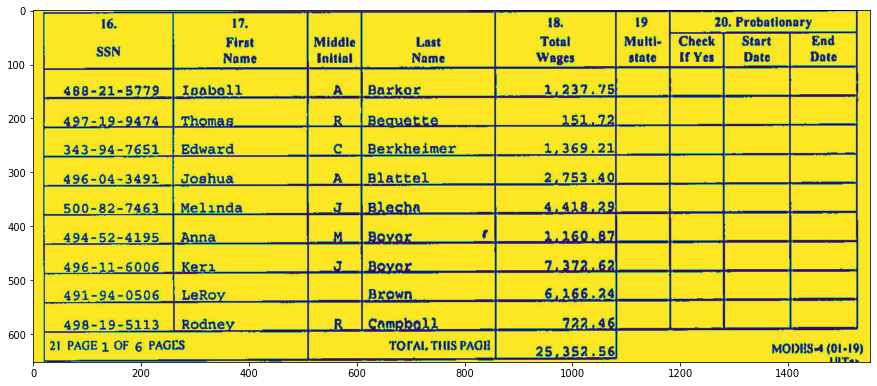

In [14]:
file = '0113647000.jpeg'
image(file)

In [12]:
display(df)

,0,1,2,3,4,5,6,7,8,9
1,16.\nSSN,"17,\nFirst\nNome",Middte\nEnitial,Last\nNome,18.\nTotal\nWages,19\nMultl-\nstate,Check\nIf Yes,Start\nDate,End\nDate,NaN
2,468-21-5779,Isabell,A,Barker,"1,237.75",NaN,NaN,NaN,NaN,NaN
3,497-19-9474,Thomas,R,Beauette,151.72,NaN,NaN,NaN,NaN,NaN
4,343-94-7651,Edward,c,Berkheimer,"1,369.21",NaN,NaN,NaN,NaN,NaN
5,496-04-3491,Joshua,A,Blattel,2.753.490,NaN,NaN,NaN,NaN,NaN
6,§00-82-7463,Melinda,Jd,Blecha,"4,418.29",NaN,NaN,NaN,NaN,NaN
7,494-52-4195,Anna,M,Boveri“ ‘sr,1.160.87,NaN,NaN,NaN,NaN,NaN
8,496-11-6006,Ker1,a,Bover,7.372.62,NaN,NaN,NaN,NaN,NaN
9,491-94-0506,LeRoy,NaN,Brown,"6.166,24",NaN,NaN,NaN,NaN,NaN
10,498-19-5113,Rodney,R,Campboll,722.46,NaN,NaN,NaN,NaN,NaN
